R0 =  1.62
Dag: 0   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 1   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 2   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 3   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 4   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 5   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 6   99999  friska,  1  sjuka  0  immuna  0 doda
Dag: 7   99998  friska,  2  sjuka  0  immuna  0 doda
Dag: 8   99996  friska,  4  sjuka  0  immuna  0 doda
Dag: 9   99996  friska,  4  sjuka  0  immuna  0 doda
Dag: 10   99996  friska,  4  sjuka  0  immuna  0 doda
Dag: 11   99995  friska,  5  sjuka  0  immuna  0 doda
Dag: 12   99995  friska,  4  sjuka  1  immuna  0 doda
Dag: 13   99994  friska,  5  sjuka  1  immuna  0 doda
Dag: 14   99994  friska,  5  sjuka  1  immuna  0 doda
Dag: 15   99992  friska,  7  sjuka  1  immuna  0 doda
Dag: 16   99992  friska,  7  sjuka  1  immuna  0 doda
Dag: 17   99992  friska,  7  sjuka  1  immuna  0 doda
Dag: 18   99991  friska,  8

Dag: 140   39560  friska,  7520  sjuka  50310  immuna  2610 doda
Dag: 141   39187  friska,  7064  sjuka  51095  immuna  2654 doda
Dag: 142   38819  friska,  6661  sjuka  51836  immuna  2684 doda
Dag: 143   38485  friska,  6235  sjuka  52551  immuna  2729 doda
Dag: 144   38197  friska,  5784  sjuka  53260  immuna  2759 doda
Dag: 145   37891  friska,  5477  sjuka  53836  immuna  2796 doda
Dag: 146   37636  friska,  5096  sjuka  54430  immuna  2838 doda
Dag: 147   37399  friska,  4758  sjuka  54981  immuna  2862 doda
Dag: 148   37195  friska,  4387  sjuka  55522  immuna  2896 doda
Dag: 149   37017  friska,  4033  sjuka  56028  immuna  2922 doda
Dag: 150   36840  friska,  3724  sjuka  56489  immuna  2947 doda
Dag: 151   36646  friska,  3521  sjuka  56865  immuna  2968 doda
Dag: 152   36506  friska,  3249  sjuka  57255  immuna  2990 doda
Dag: 153   36377  friska,  2984  sjuka  57630  immuna  3009 doda
Dag: 154   36245  friska,  2757  sjuka  57975  immuna  3023 doda
Dag: 155   36122  friska,

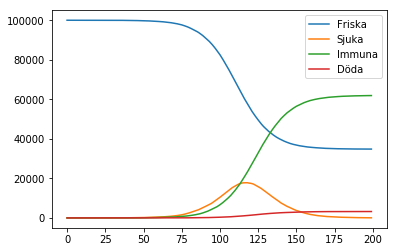

In [81]:
import random as rand
import matplotlib.pyplot as plt
# Individer kan vara friska, sjuka, immuna eller doda
# Under den sjuka perioden kan de smitta andra friska individer
# Efter sjukdomstiden blir de immuna och blir inte smittade eller smittar andra
# Greger Lindeberg april 2020
individer = [];
pop = 100000
n = 0
while n < pop:
    individer.append(["frisk",0])
    n = n + 1
smittorisk = 0.015
dodsrisk = 0.05
moten_per_dag = 9
sjukperiod = 12

print ("R0 = ", moten_per_dag*smittorisk*sjukperiod)
#print (individer)

def gor_en_sjuk(ind):
    #print (ind)
    if individer[ind][0] == "frisk":
        individer[ind][0] = "sjuk"

def smitta(moten, risk):
    for s in range(0,moten,1):
        if (rand.uniform(0,1)<smittorisk):
            gor_en_sjuk(rand.randrange(0,pop,1))
def en_dag():
    for individ in individer:
        if individ[0] == "sjuk" and individ[1]<sjukperiod:
            smitta(moten_per_dag, smittorisk)
            individ[1] = individ[1]+1
        elif individ[0] == "sjuk" and individ[1]==sjukperiod:
            if (rand.uniform(0,1)<dodsrisk):
                individ[0] = "dod"
                individ[1] = 0
            else:
                individ[0] = "immun"
                individ[1] = 0

# Simulering startar här
# Gör en individ sjuk
gor_en_sjuk(rand.randrange(0,pop,1))
#Kor ett antal dagar tex 200
dag_list = []
frisk_list = []
immun_list = []
sjuk_list = []
dod_list = []

for dag in range(0,200,1):
    en_dag()
    #print ("apa")
    friska = individer.count(["frisk",0])
    immuna = individer.count(["immun",0])
    doda = individer.count(["dod",0])
    sjuka = pop-friska-immuna-doda
    dag_list.append(dag)
    frisk_list.append(friska)
    immun_list.append(immuna)
    sjuk_list.append(sjuka)
    dod_list.append(doda)
    print("Dag:",dag," ",friska, " friska, ", sjuka, " sjuka ", immuna, " immuna ", doda, "doda")
p_frisk, = plt.plot(dag_list, frisk_list, label = "Friska")
p_sjuk, = plt.plot(dag_list, sjuk_list, label="Sjuka")
p_immun, = plt.plot(dag_list, immun_list, label = "Immuna")
p_dod, = plt.plot(dag_list, dod_list, label="Doda")
plt.legend([p_frisk, p_sjuk, p_immun, p_dod], ['Friska', 'Sjuka','Immuna','Döda'])
plt.show()

SyntaxError: invalid syntax (<ipython-input-23-7fccb0e1d82c>, line 1)